In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 28 09:46:35 2022

@author: CAPE
"""

import time
import os
from PIL import Image
import cv2
import numpy as np

'''人为构造xml文件的格式'''
out0 ='''<annotation>
    <folder>%(folder)s</folder>
    <filename>%(name)s</filename>
    <path>%(path)s</path>
    <source>
        <database>None</database>
    </source>
    <size>
        <width>%(width)d</width>
        <height>%(height)d</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
'''
out1 = '''    <object>
        <name>%(class)s</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <difficult>0</difficult>
        <bndbox>
            <xmin>%(xmin)d</xmin>
            <ymin>%(ymin)d</ymin>
            <xmax>%(xmax)d</xmax>
            <ymax>%(ymax)d</ymax>
        </bndbox>
    </object>
'''

out2 = '''</annotation>
'''

'''txt转xml函数'''
source = {}
label = {}

jpg = '/home/mmdetection/data/AOD/DATA/PLANE/P1000.png'

image= cv2.imread(jpg)#路径不能有中文
h,w,_ = image.shape #图片大小
print(h,w,_)


941 1372 3


In [6]:

fxml = jpg.replace('.png','.xml')
print(fxml)
fxml = open(fxml, 'w')
imgfile = jpg.split('/')[-1]
source['name'] = imgfile 
source['path'] = jpg
source['folder'] = 'VOC2007'

source['width'] = w
source['height'] = h

fxml.write(out0 % source)
print(source)
txt = jpg.replace('.png','.txt')
print(txt)
lines = np.loadtxt(txt)#读入txt存为数组
lines[1]


/home/mmdetection/data/AOD/DATA/PLANE/P1000.xml
{'name': 'P1000.png', 'path': '/home/mmdetection/data/AOD/DATA/PLANE/P1000.png', 'folder': 'VOC2007', 'width': 1372, 'height': 941}
/home/mmdetection/data/AOD/DATA/PLANE/P1000.txt


array([470.2531 , 763.6608 , 523.374  , 729.2795 , 557.7554 , 782.4005 ,
       504.6344 , 816.7818 , 122.9121 , 482.4438 , 741.4702 ,  63.12097,
        63.12097])

In [7]:
for line in lines:
    label['class'] = 'plane' #类别索引从0开始

    '''把txt上的数字（归一化）转成xml上框的坐标'''
    xmin = float(line[9])
    ymin = float(line[10])
    xmax = float(line[9] + line[11])
    ymax = float(line[10] + line[12])

    label['xmin'] = xmin
    label['ymin'] = ymin
    label['xmax'] = xmax
    label['ymax'] = ymax
        
    fxml.write(out1 % label)
fxml.write(out2)
fxml.close()

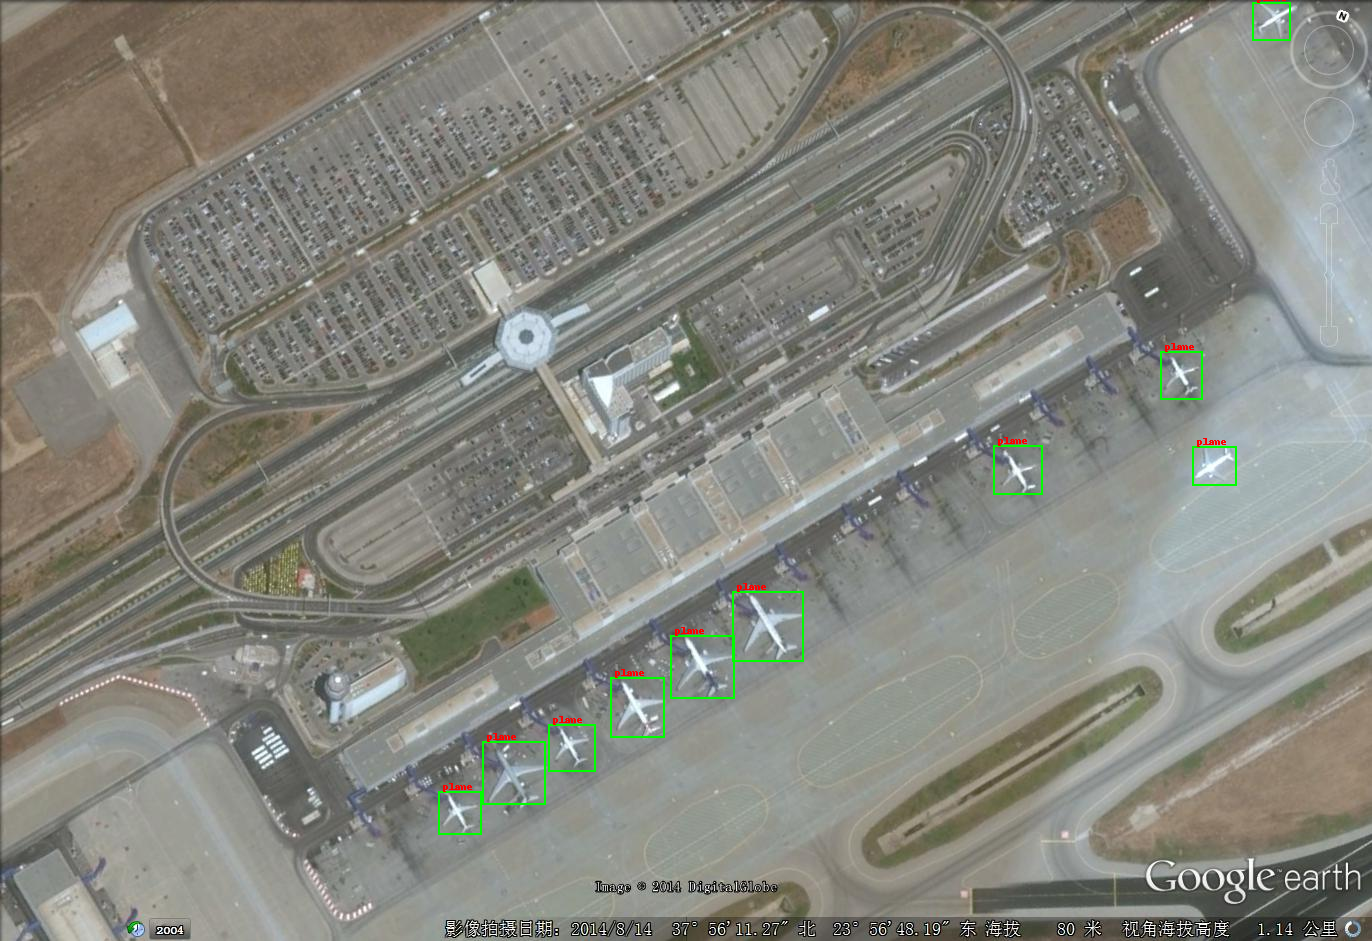

In [13]:
import xml.etree.ElementTree as ET # 读取xml。
import os
from PIL import Image,ImageDraw,ImageFont

def parse_rec(filename): 
	print()
	tree = ET.parse(filename) # 解析读取xml函数
	objects = []
	img_dir =[]
	for xml_name in tree.findall('filename'):
		img_path = os.path.join(pic_path, xml_name.text)
		img_dir.append(img_path)
	for obj in tree.findall('object'):
		obj_struct = {}
		obj_struct['name'] = obj.find('name').text
		obj_struct['pose'] = obj.find('pose').text
		obj_struct['truncated'] = int(obj.find('truncated').text)
		obj_struct['difficult'] = int(obj.find('difficult').text)
		bbox = obj.find('bndbox')
		obj_struct['bbox'] = [int(bbox.find('xmin').text),
							  int(bbox.find('ymin').text),
							  int(bbox.find('xmax').text),
							  int(bbox.find('ymax').text)]
		objects.append(obj_struct)
	
	return objects,img_dir
# 可视化
def visualise_gt(objects,img_dir): 
    img = Image.open(img_dir)
    draw = ImageDraw.Draw(img)
    for a in objects:
        xmin =int(a['bbox'][0])
        ymin =int(a['bbox'][1])
        xmax =int(a['bbox'][2])
        ymax =int(a['bbox'][3])
        label = a['name']
        draw.rectangle((xmin,ymin,xmax,ymax), fill=None, outline=(0,255,0),width=2)
        draw.text((xmin+5,ymin - 10), label, fill = (255,0,0))  # 利用ImageDraw的内置函数，在图片上写入文字
    img.show()



#fontPath = "C:\Windows\Fonts\Consolas\consola.ttf" # 字体路径
root = '/home/mmdetection/data/AOD/DATA/PLANE'
ann_path = os.path.join(root, 'P1000.xml')  # xml文件所在路径
pic_path = os.path.join(root, 'P1000.png')  # 样本图片路径
#font = ImageFont.truetype(fontPath, 16)

xml_path = ann_path
object,img_dir = parse_rec(xml_path)
visualise_gt(object,pic_path )


In [18]:
from rich.progress import track
root = '/home/mmdetection/data/AOD/DATA/PLANE/'
class_name  = 'plane'
png_lists = os.listdir(root)
png_lists = [i for i in png_lists if 'png' in i]
png_lists.sort()
kk = 0
for img in track(png_lists):
    #print(img)
    jpg = root + img
    image= cv2.imread(jpg)#路径不能有中文
    h,w,_ = image.shape #图片大小

    fxml = jpg.replace('.png','.xml')
    #print(fxml)
    fxml = open(fxml, 'w')
    imgfile = jpg.split('/')[-1]
    source['name'] = imgfile 
    source['path'] = jpg
    source['folder'] = 'VOC2007'

    source['width'] = w
    source['height'] = h

    fxml.write(out0 % source)
    txt = jpg.replace('.png','.txt')
    lines = np.loadtxt(txt)#读入txt存为数组

    if lines.shape == (13,):
        lines = lines.reshape(1,13)
    for line in lines:
        kk += 1
        label['class'] = class_name #类别索引从0开始

        '''把txt上的数字（归一化）转成xml上框的坐标'''
        xmin = int(line[9])
        ymin = int(line[10]) 
        xmax = int(line[9] + line[11])
        ymax = int(line[10] + line[12])

        label['xmin'] = xmin
        label['ymin'] = ymin
        label['xmax'] = xmax
        label['ymax'] = ymax
            
        fxml.write(out1 % label)
    fxml.write(out2)
    fxml.close()

Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 100% 0:00:01

In [19]:
lines = np.loadtxt('/home/mmdetection/data/AOD/DATA/PLANE/P0388.txt')
lines.shape

(13,)

In [20]:
kk

7482

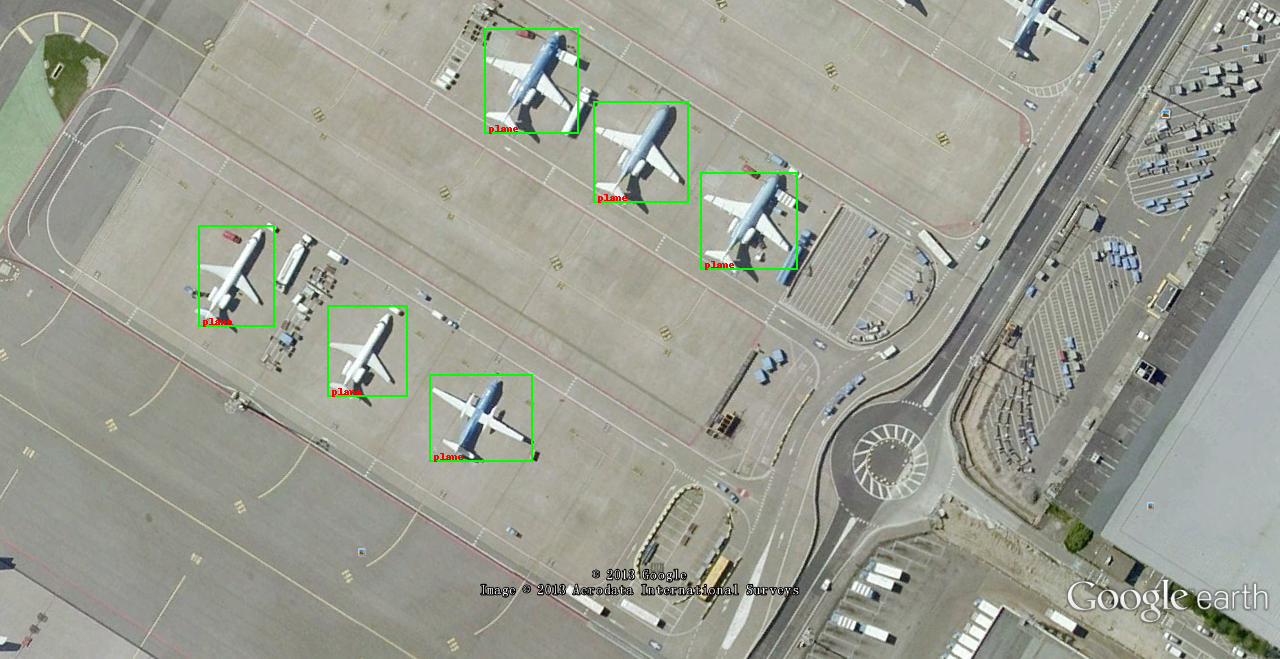

In [2]:
import xml.etree.ElementTree as ET # 读取xml。
import os
from PIL import Image,ImageDraw,ImageFont

def parse_rec(filename): 
	print()
	tree = ET.parse(filename) # 解析读取xml函数
	objects = []
	img_dir =[]
	for xml_name in tree.findall('filename'):
		img_path = os.path.join(pic_path, xml_name.text)
		img_dir.append(img_path)
	for obj in tree.findall('object'):
		obj_struct = {}
		obj_struct['name'] = obj.find('name').text
		obj_struct['pose'] = obj.find('pose').text
		obj_struct['truncated'] = int(obj.find('truncated').text)
		obj_struct['difficult'] = int(obj.find('difficult').text)
		bbox = obj.find('bndbox')
		obj_struct['bbox'] = [int(bbox.find('xmin').text),
							  int(bbox.find('ymin').text),
							  int(bbox.find('xmax').text),
							  int(bbox.find('ymax').text)]
		objects.append(obj_struct)
	
	return objects,img_dir
# 可视化
def visualise_gt(objects,img_dir): 
    img = Image.open(img_dir)
    draw = ImageDraw.Draw(img)
    for a in objects:
        xmin =int(a['bbox'][0])
        ymin =int(a['bbox'][1])
        xmax =int(a['bbox'][2])
        ymax =int(a['bbox'][3])
        label = a['name']
        draw.rectangle((xmin,ymin,xmax,ymax), fill=None, outline=(0,255,0),width=2)
        draw.text((xmin+5,ymax - 10), label, fill = (255,0,0))  # 利用ImageDraw的内置函数，在图片上写入文字
    img.show()



#fontPath = "C:\Windows\Fonts\Consolas\consola.ttf" # 字体路径
root = '/home/mmdetection/data/AOD/VOC2007'
ann_path = os.path.join(root,'Annotations', 'P0183.xml')  # xml文件所在路径
pic_path = os.path.join(root,'JPEGImages', 'P0183.jpg')  # 样本图片路径
#font = ImageFont.truetype(fontPath, 16)

xml_path = ann_path
object,img_dir = parse_rec(xml_path)
visualise_gt(object,pic_path )


In [24]:
import os
import pandas as pd
import random 
file_obj = open("/home/mmdetection/data/AOD/VOC2007/ImageSets/Main/val.txt", 'w', encoding='utf-8')
file_obj2 = open("/home/mmdetection/data/AOD/VOC2007/ImageSets/Main/train.txt", 'w', encoding='utf-8')
#file_obj3 = open("VOC2007/ImageSets/Main/test.txt", 'w', encoding='utf-8')

jpg_list = os.listdir('../VOC2007/JPEGImages')
#jpg_list_test = os.listdir('test')

 
def data_split(full_list, ratio, shuffle=False):
    """
    数据集拆分: 将列表full_list按比例ratio（随机）划分为2个子列表sublist_1与sublist_2
    :param full_list: 数据列表
    :param ratio:     子列表1
    :param shuffle:   子列表2
    :return:
    """
    n_total = len(full_list)
    offset = int(n_total * ratio)
    if n_total == 0 or offset < 1:
        return [], full_list
    if shuffle:
        random.shuffle(full_list)
    sublist_1 = full_list[:offset]
    sublist_2 = full_list[offset:]
    return sublist_1, sublist_2
 
val, train = data_split(jpg_list, ratio=0.05, shuffle=True)
print(len(train))
print(len(val))

    
for i in val:
    k = str(i.split('.')[0])
    # other_url = k.zfill(6)
    #print(k)
    file_obj.writelines(k)
    file_obj.write('\n')

file_obj.close()

for i in train:
    k = str(i.split('.')[0])
    # other_url = k.zfill(6)
    #print(k)
    file_obj2.writelines(k)
    file_obj2.write('\n')

file_obj2.close()

950
50


In [2]:
imglist = os.listdir('/home/mmdetection/data/AOD/VOC2007/JPEGImages')

for i in imglist:
    os.rename('/home/mmdetection/data/AOD/VOC2007/JPEGImages/' + i, '/home/mmdetection/data/AOD/VOC2007/JPEGImages/' + i[:-3]+'jpg')